In [2]:
using PyPlot
using JuMP
using Ipopt
using SpectraJu

data = readdlm("./data/Fo_exp6_P5.txt", '\t')

#  the experience details
step = 5. *1e-6 # steps in meters
time = 20.0 *3600.0 # time in seconds
println("Done")

Done


In [3]:
start_sp = 22
stop_sp = 100
low_x = 3560.
high_x = 3630.
first_bound_norm = 1650.
second_bound_norm = 2150.

x, y, x_fit, y_fit = IRdataprep(data,step,start_sp,stop_sp,low_x,high_x,first_bound_norm,second_bound_norm)
println("Done")

Done


In [4]:
function sqerror(betas)
    err = sum((model(betas,x_fit,time) - y_fit).^2)
end

# with the Optim library
#res1 = optimize(sqerror,p0,method=:nelder_mead,iterations = 4000) 
#intermediate_p = res1.minimum

# number of data =
n = size(x_fit)[1]
time = 20.*3600

mod = Model(solver=IpoptSolver(print_level=0))

# The parameters, for each gaussian
@defVar(mod,g1_p[i=1:5])
@defVar(mod,g2_p[i=1:5]) 
@defVar(mod,g3_p[i=1:5]) 
@defVar(mod,g4_p[i=1:5]) 
@defVar(mod,g5_p[i=1:5]) 

#Initial values
setValue(g1_p[1], 0.00001)
setValue(g1_p[2], .00002)
setValue(g1_p[3], -12.0)
setValue(g1_p[4], 3566)
setValue(g1_p[5], 3.0)

setValue(g2_p[1], 0.00001)
setValue(g2_p[2], 0.0001)
setValue(g2_p[3], -13.0)
setValue(g2_p[4], 3579)
setValue(g2_p[5], 3.0)

setValue(g3_p[1], 0.00001)
setValue(g3_p[2], 0.00005)
setValue(g3_p[3], -12.0)
setValue(g3_p[4], 3591)
setValue(g3_p[5], 3.0)

setValue(g4_p[1], 0.00001)
setValue(g4_p[2], 0.0003)
setValue(g4_p[3], -13.0)
setValue(g4_p[4], 3614)
setValue(g4_p[5], 3.0)

setValue(g5_p[1], 0.00001)
setValue(g5_p[2], 0.00004)
setValue(g5_p[3], -13.0)
setValue(g5_p[4], 3624)
setValue(g5_p[5], 3.0)

# Constrains
#@addConstraint(mod, g1_p[1] >= 0.)
#@addConstraint(mod, g1_p[2] >= 0.)
#@addConstraint(mod, -20 <= g1_p[3] <= 0.0)
#@addConstraint(mod, 3560 <= g1_p[4] <= 3570)
#@addConstraint(mod, 0 <= g1_p[5] <= 10)

#@addConstraint(mod, g2_p[1] >= 0.)
#@addConstraint(mod, g2_p[2] >= 0.)
#@addConstraint(mod, -20 <= g2_p[3] <= 0.0)
#@addConstraint(mod, 3570 <= g2_p[4] <= 3581)
#@addConstraint(mod, 0 <= g2_p[5] <= 10)

#@addConstraint(mod, g3_p[1] >= 0.)
#@addConstraint(mod, g3_p[2] >= 0.)
#@addConstraint(mod, -20 <= g3_p[3] <= 0.0)
#@addConstraint(mod, 3585 <= g3_p[4] <= 3600)
#@addConstraint(mod, 0 <= g3_p[5] <= 10)

#@addConstraint(mod, g4_p[1] >= 0.)
#@addConstraint(mod, g4_p[2] >= 0.)
#@addConstraint(mod, -20 <= g4_p[3] <= 0.0)
#@addConstraint(mod, 3600 <= g4_p[4] <= 3620)
#@addConstraint(mod, 0 <= g4_p[5] <= 10)

#@addConstraint(mod, g5_p[1] >= 0.)
#@addConstraint(mod, g5_p[2] >= 0.)
#@addConstraint(mod, -20 <= g5_p[3] <= 0.0)
#@addConstraint(mod, 3620 <= g5_p[4] <= 3630)
#@addConstraint(mod, 0 <= g5_p[5] <= 10)

# The expression
@defNLExpr(g1_mod[j=1:n],((g1_p[2] - g1_p[1]) * erfc(x_fit[j,1]/(2. * sqrt( 10^g1_p[3] * time))) + g1_p[1]) *exp(-log(2) * ((x_fit[j,2]-g1_p[4])/g1_p[5])^2))
@defNLExpr(g2_mod[j=1:n],((g2_p[2] - g2_p[1]) * erfc(x_fit[j,1]/(2. * sqrt( 10^g2_p[3] * time))) + g2_p[1]) *exp(-log(2) * ((x_fit[j,2]-g2_p[4])/g2_p[5])^2))
@defNLExpr(g3_mod[j=1:n],((g3_p[2] - g3_p[1]) * erfc(x_fit[j,1]/(2. * sqrt( 10^g3_p[3] * time))) + g3_p[1]) *exp(-log(2) * ((x_fit[j,2]-g3_p[4])/g3_p[5])^2))
@defNLExpr(g4_mod[j=1:n],((g4_p[2] - g4_p[1]) * erfc(x_fit[j,1]/(2. * sqrt( 10^g4_p[3] * time))) + g4_p[1]) *exp(-log(2) * ((x_fit[j,2]-g4_p[4])/g4_p[5])^2))
@defNLExpr(g5_mod[j=1:n],((g5_p[2] - g5_p[1]) * erfc(x_fit[j,1]/(2. * sqrt( 10^g5_p[3] * time))) + g5_p[1]) *exp(-log(2) * ((x_fit[j,2]-g5_p[4])/g5_p[5])^2))

@defNLExpr(y_model[j=1:n], g1_mod[j] + g2_mod[j] + g3_mod[j] + g4_mod[j] + g5_mod[j])

@setNLObjective(mod,Min,sum{(y_model[j] - y_fit[j])^2, j=1:n})
println("Constructed...")

Constructed...


We now plot the data to see how looks like the initial model. If not good, we update the above values.

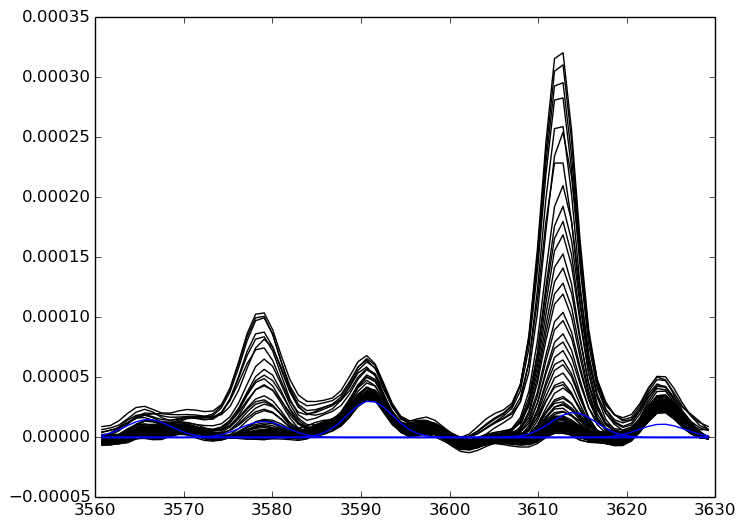

5-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb0043c6690>
 PyObject <matplotlib.lines.Line2D object at 0x7fb0041be3d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fb0041be590>
 PyObject <matplotlib.lines.Line2D object at 0x7fb0041be750>
 PyObject <matplotlib.lines.Line2D object at 0x7fb0041be910>

In [5]:
#constructing an initial representation of the model
p0 = [getValue(g1_p[1]),getValue(g1_p[2]),getValue(g1_p[3]),getValue(g1_p[4]),getValue(g1_p[5]),getValue(g2_p[1]),getValue(g2_p[2]),getValue(g2_p[3]),getValue(g2_p[4]),getValue(g2_p[5]),getValue(g3_p[1]),getValue(g3_p[2]),getValue(g3_p[3]),getValue(g3_p[4]),getValue(g3_p[5]),getValue(g4_p[1]),getValue(g4_p[2]),getValue(g4_p[3]),getValue(g4_p[4]),getValue(g4_p[5]),getValue(g5_p[1]),getValue(g5_p[2]),getValue(g5_p[3]),getValue(g5_p[4]),getValue(g5_p[5])]

selected_spectrum = 50 #for peak fitting figures
composantes = model(p0,x_fit,Float64(time),compo_out=1)
interest_compos = composantes[selected_spectrum*length(x)+1:selected_spectrum*length(x)+length(x),:]

plot(x, y[:,:], color="black", linewidth=1.0, linestyle="-")
plot(x,interest_compos[:,:],color="blue", linewidth=1.0, linestyle="-")

And we launch the optimisation procedure with the Ipopt algorithm.

In [6]:
#res1 = optimize(sqerror,intermediate_p,method=:simulated_annealing,iterations = 1000)

# Solve for the control and state
println("Solving...")
status = solve(mod)

# Display results
println("Solver status: ", status)
println("rmsd: ", getObjectiveValue(mod))


Solving...

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Solver status: Optimal
rmsd: 1.2347604001700583e-7


We have a good solution. Let's see now how things look like:

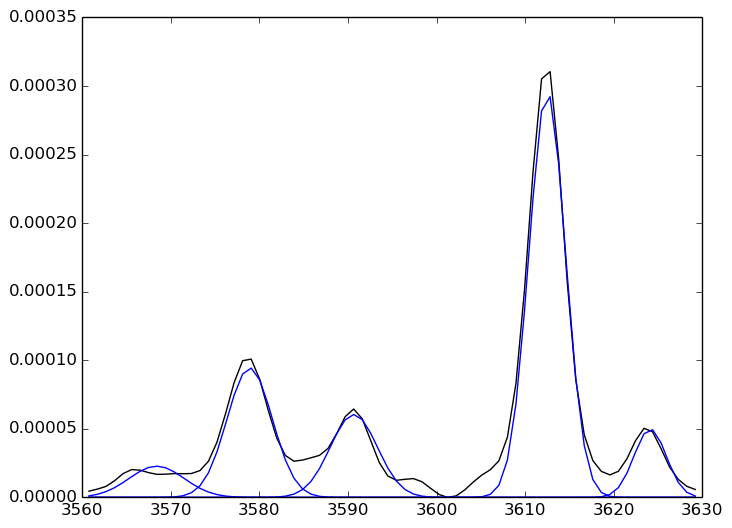

5-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb003eea210>
 PyObject <matplotlib.lines.Line2D object at 0x7fb003eea8d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fb003eeaa90>
 PyObject <matplotlib.lines.Line2D object at 0x7fb003eeac50>
 PyObject <matplotlib.lines.Line2D object at 0x7fb003eeae10>

In [7]:
best_params = [getValue(g1_p[1]),getValue(g1_p[2]),getValue(g1_p[3]),getValue(g1_p[4]),getValue(g1_p[5]),getValue(g2_p[1]),getValue(g2_p[2]),getValue(g2_p[3]),getValue(g2_p[4]),getValue(g2_p[5]),getValue(g3_p[1]),getValue(g3_p[2]),getValue(g3_p[3]),getValue(g3_p[4]),getValue(g3_p[5]),getValue(g4_p[1]),getValue(g4_p[2]),getValue(g4_p[3]),getValue(g4_p[4]),getValue(g4_p[5]),getValue(g5_p[1]),getValue(g5_p[2]),getValue(g5_p[3]),getValue(g5_p[4]),getValue(g5_p[5])]

selected_spectrum = 2 #for peak fitting figures
composantes = model(best_params,x_fit,Float64(time),compo_out=1)
interest_compos = composantes[selected_spectrum*length(x)+1:selected_spectrum*length(x)+length(x),:]

plot(x, y[:,selected_spectrum], color="black", linewidth=1.0, linestyle="-")
plot(x,interest_compos[:,:],color="blue", linewidth=1.0, linestyle="-")

In [ ]:
time